# Library Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import chi2
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

In [2]:
df = pd.read_csv(r'C:\Users\USER\Downloads\heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
display(df.isnull().sum()) # to check total missing values in each column

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

there are no missing values

In [7]:
### in this data set you i observes that i have been provided with both continous and categorical variables therefore 
### i will be splitting the data frame into two to continue this analysis 

In [8]:
categorical = df[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continous = df[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]]

In [9]:
continous.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [10]:
df.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


In [11]:
skew(continous)

array([ 0.42093656,  4.44068863,  0.55259266,  1.45497453,  4.43361016,
       -1.04287046,  0.1271606 ])

In [12]:
kurtosis(continous)

array([-2.01793492e-01,  2.47104580e+01,  2.07201302e-02,  6.08590585e+00,
        2.53783458e+01,  4.03114230e+00, -1.21187428e+00])

<function matplotlib.pyplot.show(close=None, block=None)>

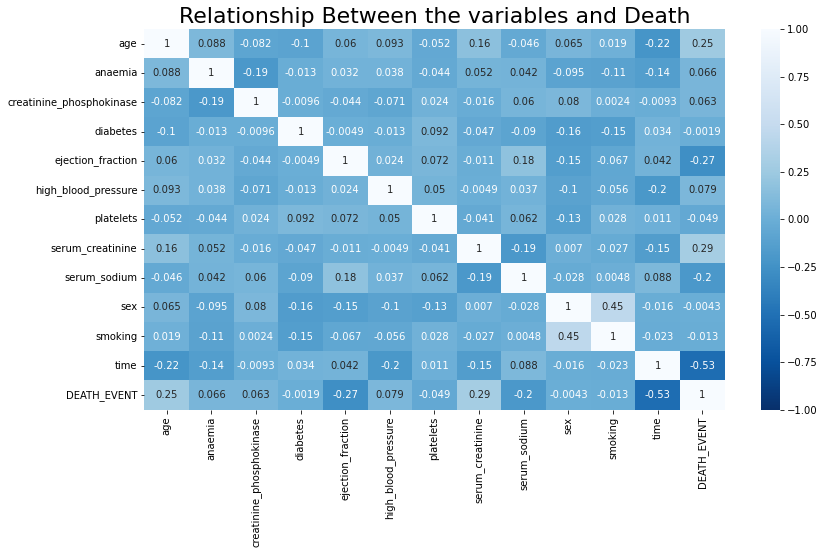

In [13]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="Blues_r", annot=True)
plt.title("Relationship Between the variables and Death", fontsize=22)
plt.show

Conclusion: from the heat map we observe a positive correlation between age, serum_creatinine and death. also we observe a negative correlation between death and time, ejection fraction and serum sodium

# Visualization

.

.

In [14]:
#we are creating two lists one for caterogival variables and the other for continous variables
categorical_data = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
continous_data = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

<function matplotlib.pyplot.show(close=None, block=None)>

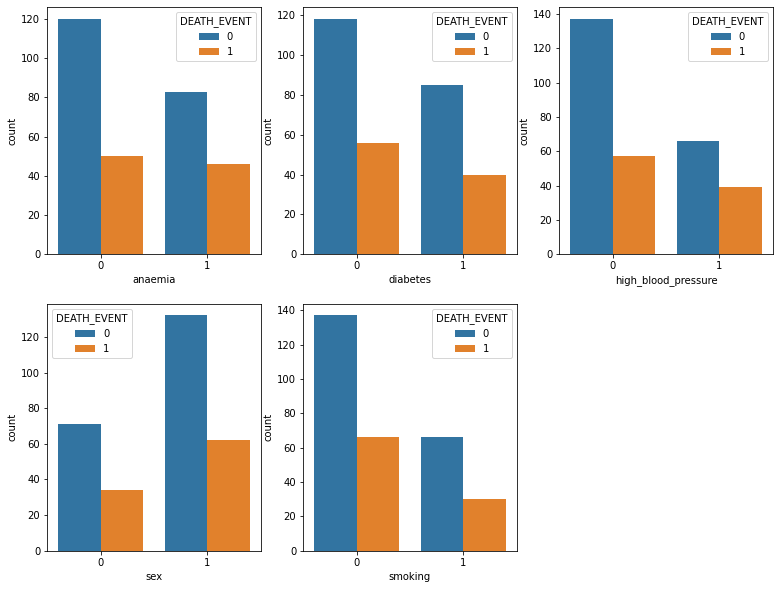

In [15]:
#display the impact of categorical variables on death
plt.figure(figsize=(13,10))
for i,cat in enumerate(categorical_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=cat, hue="DEATH_EVENT")
plt.show

from the above the we see that:
1. Patients without diabetes, anaemia, and high bloos pressure have a higher survival rate when they encounter heart failure
2. The frmale gemder has a higher survival rate when tackeling heart failure 
3. Patients who do not smoke have a higher chance of survuval with respect to heart failure 

<function matplotlib.pyplot.show(close=None, block=None)>

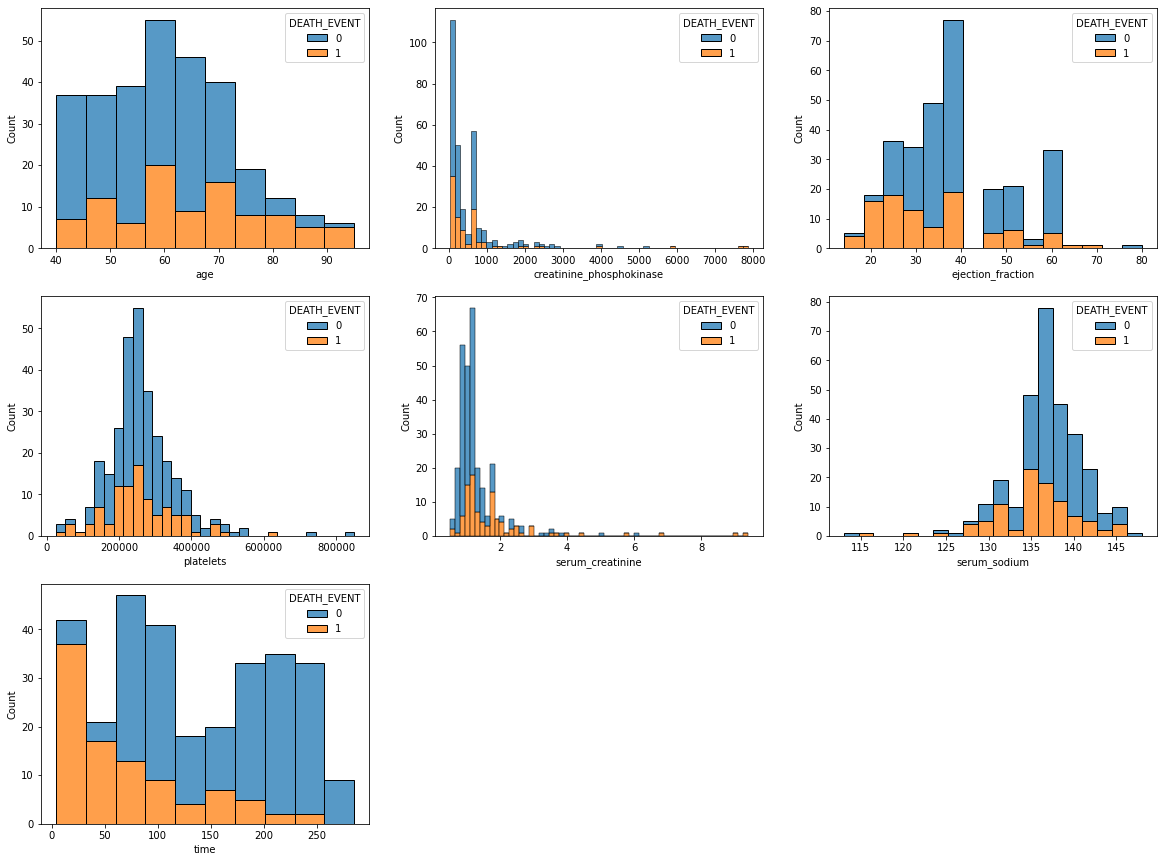

In [16]:
#display the impact of continous variables on death
plt.figure(figsize=(20,15))
for j,con in enumerate(continous_data):
    plt.subplot(3,3,j+1)
    sns.histplot(data=df, x=con, hue="DEATH_EVENT", multiple = "stack")
plt.show

Conclusion: 
1. age: death event is higest at the age of 60, then 70 and 50
2. creatinine_phosphokinase: Death event occures between 0-1000
3. ejection fraction: Death ecent is at its peak between 20 &40
4. Platelets: patients with platelets count between 200000 and 300000 are at higher risk of death 
5. serum_cratinine: death events occures more bwtween 1 & 2 serum creatinine count
6. serm_sodium: patients with serum sodium between 135-140 have a higher risk of death 
7. time: death event occures most at the earliest hours of the day

.

### Scattered Plot for Continous Variables

[]

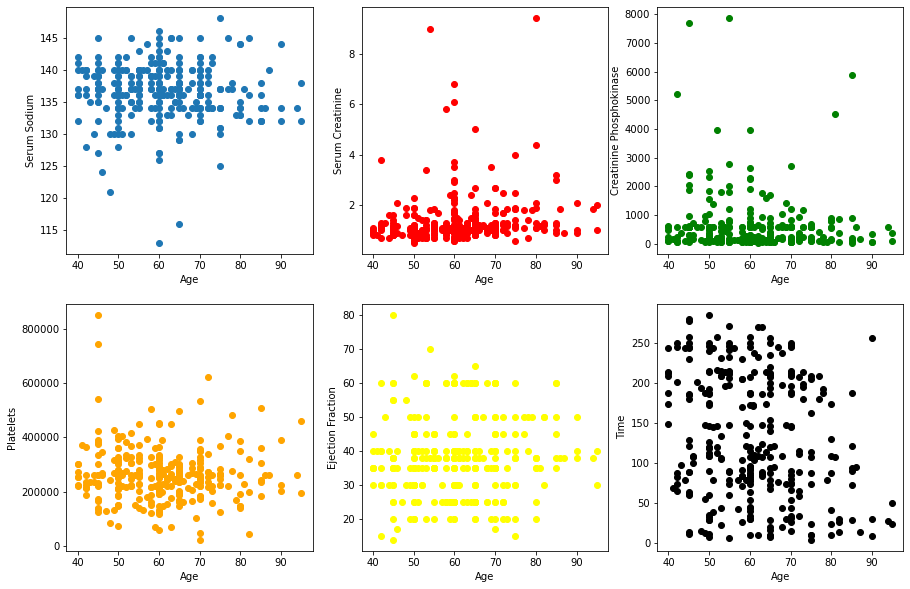

In [17]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.scatter(x=df['age'], y=df['serum_sodium'])
plt.xlabel('Age')
plt.ylabel('Serum Sodium')
plt.plot()

plt.subplot(2,3,2)
plt.scatter(x=df['age'], y = df['serum_creatinine'], color='red')
plt.xlabel('Age')
plt.ylabel('Serum Creatinine')
plt.plot()

plt.subplot(2,3,3)
plt.scatter(x=df['age'], y = df['creatinine_phosphokinase'], color = 'green')
plt.xlabel('Age')
plt.ylabel('Creatinine Phosphokinase')
plt.plot()

plt.subplot(2,3,4)
plt.scatter(x=df['age'], y = df['platelets'], color = 'orange')
plt.xlabel('Age')
plt.ylabel('Platelets')
plt.plot()

plt.subplot(2,3,5)
plt.scatter(x=df['age'], y = df['ejection_fraction'], color = 'yellow')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.plot()

plt.subplot(2,3,6)
plt.scatter(x=df['age'], y = df['time'], color = 'black')
plt.xlabel('Age')
plt.ylabel('Time')
plt.plot()

In [18]:
### the survival rate between smokers and non smokers 
smokers = df[df['smoking']==1]
non_smokers = df[df['smoking']==0]

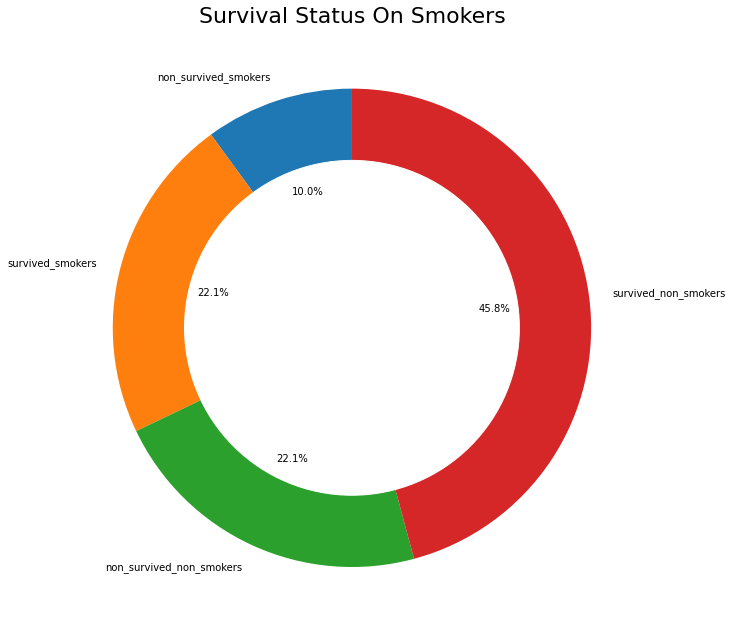

In [19]:
non_survived_smokers = smokers[smokers["DEATH_EVENT"]==1]
survived_smokers = smokers[smokers["DEATH_EVENT"]==0]
non_survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==1]
survived_non_smokers= non_smokers[non_smokers["DEATH_EVENT"]==0]

smoking_data = [len(non_survived_smokers), len(survived_smokers), len(non_survived_non_smokers), len(survived_non_smokers)]
smoking_labels = ["non_survived_smokers","survived_smokers","non_survived_non_smokers","survived_non_smokers"]

plt.figure(figsize=(11,11))
plt.pie(smoking_data, labels=smoking_labels, autopct="%.1f%%", startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival Status On Smokers", fontsize=22)
plt.show()

Conclusion:
1. Amongst The people who do not have smoking habits, 45.8% of the population survived the event of a heart failure while 22.1% people succumbed to the condition
2. Admist The people who have smokeing habits, 22.1% of the population survived the event of a heart failure while 10% people succumbed to the condition.

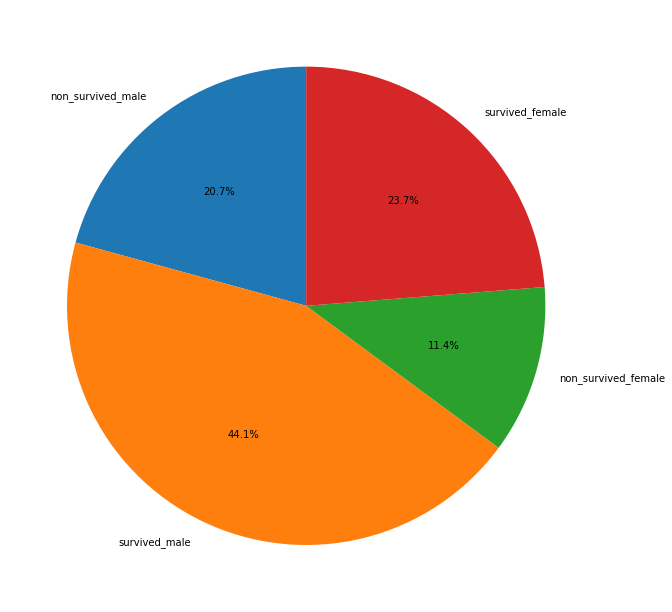

In [20]:
### survival status on sex 
male = df[df['sex']==1]
female = df[df['sex']==0]

non_survived_male = male[male["DEATH_EVENT"]==1]
survived_male = male[male["DEATH_EVENT"]==0]
non_survived_female = female[female["DEATH_EVENT"]==1]
survived_female= female[female["DEATH_EVENT"]==0]

gender_data = [len(non_survived_male), len(survived_male), len(non_survived_female), len(survived_female)]
gender_labels = ["non_survived_male","survived_male","non_survived_female","survived_female"]

plt.figure(figsize=(11,11))
plt.pie(gender_data, labels=gender_labels, autopct="%.1f%%", startangle=90)
#circle = plt.Circle((0,0), 0.7, color="white")
#p = plt.gcf()
#p.gca().add_artist(circle)
#plt.title("Survival Status On Gender", fontsize=22)
plt.show()

1. The male gender has a significantly large survival rate of 44.1% whereas the female survival rate is at 23.7%

 ## Chi - Square

In [21]:
numeric = ['age', 'creatinine_phosphokinase', 
           'ejection_fraction', 'platelets', 
           'serum_creatinine', 'time', 'serum_sodium']



categorical_dataa = ['anaemia',
                     'diabetes',
                     'high_blood_pressure',
                     'sex',
                     'smoking',
                     'DEATH_EVENT']
test_df = df.drop(columns=numeric)
test_df.head()


,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1


In [22]:
# independent features vs Target Variable

dict5 = dict()
independent = ('anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking')
chi2_val, p_val = chi2(test_df.iloc[:, 0:5], test_df.iloc[:, -1])

itr = 0
for i in independent:
    string = f'DEATH_EVENT vs {i}'
    dict5[string] = p_val[itr]
    itr += 1
    
dict5

{'DEATH_EVENT vs anaemia': 0.387556924759485,
 'DEATH_EVENT vs diabetes': 0.9795537403764981,
 'DEATH_EVENT vs high_blood_pressure': 0.2690589262568509,
 'DEATH_EVENT vs sex': 0.9647213115147079,
 'DEATH_EVENT vs smoking': 0.8572685693681174}

In [23]:
Chi_heat_plot = [[0,0.8666559347273115,0.594854992140792,0.3315020306255289,0.1263525006678854,0.387556924759485],
            [0.8666559347273115,0,0.8592401113570308,0.10604103630413232,0.05221575927284853,0.9795537403764981],
            [0.594854992140792,0.8592401113570308,0,0.28372858577976934,0.43776694989237386,0.2690589262568509],
            [0.3315020306255289,0.10604103630413232,0.28372858577976934,0,.0004899856713610,0.9647213115147079],
            [0.1263525006678854,0.05221575927284853,0.43776694989237386,.0004899856713610,0,0.8572685693681174],
            [0.387556924759485,0.9795537403764981,0.2690589262568509,0.9647213115147079,0.8572685693681174,0]]

categorical_data = ['anaemia',
                     'diabetes',
                     'high_bp',
                     'sex',
                     'smoking',
                     'DEATH_EVENT']

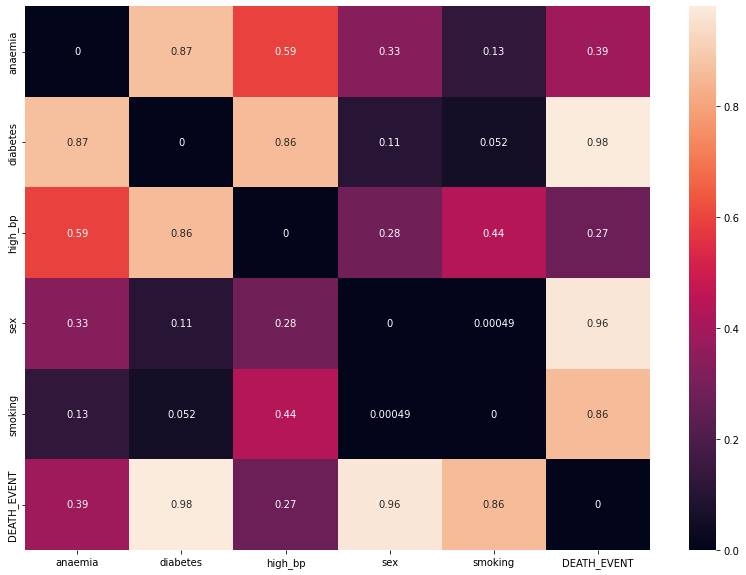

In [24]:
fig = plt.figure(figsize=(14, 10))
sns.heatmap(Chi_heat_plot, annot = True)
plt.xticks([i+0.5 for i in range(6)], categorical_data)
plt.yticks([i+0.5 for i in range(6)], categorical_data)
plt.show()

## Results of Chi2 Test:

- Ho = The variables are not related (p_val > 0.05)
- H1 = The variables are related (p_val < 0.05)

1. DEATH_EVENT our target variable shows no significant relation with any of the other variables.
2. SEX and SMOKING share a very strong relation this result was expected considering the earlier observations.
3. SMOKING and DIABETES also share a strong relation.

### Conclusion:

**None of the categorical variables share a strong relation with the target variable but there are some independent variable which are closely related so we will probably drop one of those variables to avoid a bias** 

# Data Modelling and Prediction

In [25]:
x = df[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]]
y = df["DEATH_EVENT"]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

## Classification I

### Logistic Regression

In [27]:
accuracy_list = [] #### an empty list to append all the values from different models accuracy for comparisn

In [28]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_prediction = lr_model.predict(x_test)
lr_accuracy = (round(accuracy_score(lr_prediction, y_test), 4) * 100) ###percentage
accuracy_list.append(lr_accuracy)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, lr_prediction, average='weighted')
cm=confusion_matrix(y_test,lr_prediction)
print("Train Accuracy: ", lr_accuracy)
print("F1 score Test: ", f1_score(lr_prediction, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Train Accuracy:  86.67
F1 score Test:  0.7500000000000001
Precision: 0.8637037037037038
Recall of: 0.8666666666666667


array([[40,  3],
       [ 5, 12]], dtype=int64)

### Support Vector Machine

In [29]:
svc_model = SVC()
svc_model.fit(x_train, y_train)
svc_prediction = svc_model.predict(x_test)
svc_accuracy = (round(accuracy_score(svc_prediction, y_test), 4) * 100) ###percentage
accuracy_list.append(svc_accuracy)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, svc_prediction, average='weighted')
cm=confusion_matrix(y_test,svc_prediction)
print("Train Accuracy: ", svc_accuracy)
print("F1 score Test: ", f1_score(svc_prediction, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Train Accuracy:  71.67
F1 score Test:  0.0
Precision: 0.5136111111111111
Recall of: 0.7166666666666667


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[43,  0],
       [17,  0]], dtype=int64)

### KNearestNeighbour

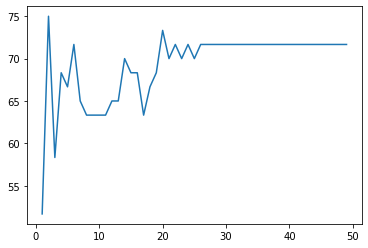

In [30]:
knn_list = []
for i in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    knn_prediction = knn_model.predict(x_test)
    knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100) ###percentage
    knn_list.append(knn_accuracy)
i = np.arange(1,50)
plt.plot(i, knn_list)

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train, y_train)
knn_prediction = knn_model.predict(x_test)
knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100) ###percentage
accuracy_list.append(knn_accuracy)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, knn_prediction, average='weighted')
cm=confusion_matrix(y_test,knn_prediction)
print("Train Accuracy: ", knn_accuracy)
print("F1 score Test: ", f1_score(knn_prediction, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))

cm

Train Accuracy:  71.67
F1 score Test:  0.19047619047619047
Precision: 0.6663690476190476
Recall of: 0.7166666666666667


array([[41,  2],
       [15,  2]], dtype=int64)

### Decision Tree Classifier

In [32]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt_model.fit(x_train, y_train)
dt_prediction = dt_model.predict(x_test)
dt_accuracy = (round(accuracy_score(dt_prediction, y_test), 4) * 100) ###percentage
accuracy_list.append(dt_accuracy)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, dt_prediction, average='weighted')
cm=confusion_matrix(y_test,dt_prediction)
print("Train Accuracy: ", dt_accuracy)
print("F1 score Test: ", f1_score(dt_prediction, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Train Accuracy:  90.0
F1 score Test:  0.7857142857142858
Precision: 0.9122448979591836
Recall of: 0.9


array([[43,  0],
       [ 6, 11]], dtype=int64)

### Naive Bayes

In [33]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_prediction = nb_model.predict(x_test)
nb_accuracy = (round(accuracy_score(nb_prediction, y_test), 4) * 100) ###percentage
accuracy_list.append(nb_accuracy)
cm=confusion_matrix(y_test,nb_prediction)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, nb_prediction, average='weighted')
print("Train Accuracy: ", nb_accuracy)
print("F1 score Test: ", f1_score(nb_prediction, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Train Accuracy:  83.33
F1 score Test:  0.6666666666666667
Precision: 0.8278777959629023
Recall of: 0.8333333333333334


array([[40,  3],
       [ 7, 10]], dtype=int64)

### Random Forest Classifier

In [34]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
rfc_prediction = rfc_model.predict(x_test)
rfc_accuracy = (round(accuracy_score(rfc_prediction, y_test), 4) * 100) ###percentage
accuracy_list.append(rfc_accuracy)
cm=confusion_matrix(y_test,rfc_prediction)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, rfc_prediction, average='weighted')
print("Train Accuracy: ", rfc_accuracy)
print("F1 score Test: ", f1_score(rfc_prediction, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Train Accuracy:  93.33
F1 score Test:  0.8749999999999999
Precision: 0.9333333333333333
Recall of: 0.9333333333333333


array([[42,  1],
       [ 3, 14]], dtype=int64)

### Multi-Layer Perceptron Neural Networks. Evaluate

In [35]:
clf_model = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)
clf_model.fit(x_train, y_train)
clf_prediction = clf_model.predict(x_test)
clf_accuracy = (round(accuracy_score(clf_prediction, y_test), 4) * 100) ###percentage
accuracy_list.append(clf_accuracy)
cm=confusion_matrix(y_test,clf_prediction)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, clf_prediction, average='weighted')
print("Train Accuracy: ", clf_accuracy)
print("F1 score Test: ", f1_score(clf_prediction, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Iteration 1, loss = 11.91401685
Iteration 2, loss = 11.91401670
Iteration 3, loss = 24.12964802
Iteration 4, loss = 24.12964781
Iteration 5, loss = 24.12964761
Iteration 6, loss = 24.12964741
Iteration 7, loss = 24.12964722
Iteration 8, loss = 21.76299737
Iteration 9, loss = 11.91401538
Iteration 10, loss = 11.91401522
Iteration 11, loss = 11.91401507
Iteration 12, loss = 11.91401492
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Train Accuracy:  71.67
F1 score Test:  0.0
Precision: 0.5136111111111111
Recall of: 0.7166666666666667


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[43,  0],
       [17,  0]], dtype=int64)

### Investigating  Imbalance

In [36]:
y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:ylabel='DEATH_EVENT'>

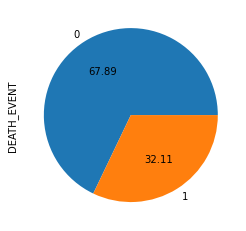

In [37]:
y.value_counts().plot.pie(autopct='%.2f')

### Random Under Sampling

0    96
1    96
Name: DEATH_EVENT, dtype: int64

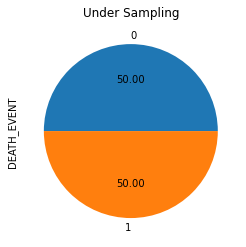

In [38]:
rus = RandomUnderSampler(sampling_strategy=1) #float
#rus = RandomUnderSampler(sampling_strategy="not minority") #string
x_res, y_res = rus.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_= ax.set_title("Under Sampling")
y_res.value_counts()

### Random Over samoling

1    203
0    203
Name: DEATH_EVENT, dtype: int64

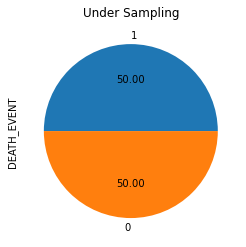

In [39]:
ros = RandomOverSampler(sampling_strategy=1) #float
#rus = RandomOverrSampler(sampling_strategy="not minority") #string
x_res2, y_res2 = ros.fit_resample(x, y)

ax = y_res2.value_counts().plot.pie(autopct='%.2f')
_= ax.set_title("Under Sampling")
y_res2.value_counts()

In [40]:
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_res2, y_res2, test_size=0.2, random_state=2)

In [41]:
accuracy_list2 = [] #### an empty list to append all the values from different models accuracy for comparisn

 ### Logistic regression (Balanced)

In [42]:

lr_model_b = LogisticRegression()
lr_model_b.fit(x_train_b, y_train_b)
lr_prediction_b = lr_model_b.predict(x_test)
lr_accuracy_b = (round(accuracy_score(lr_prediction_b, y_test), 4) * 100) ###percentage
accuracy_list2.append(lr_accuracy_b)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, lr_prediction_b, average='weighted')
cm=confusion_matrix(y_test,lr_prediction_b)
print("Train Accuracy: ", lr_accuracy_b)
print("F1 score Test: ", f1_score(lr_prediction_b, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Train Accuracy:  81.67
F1 score Test:  0.7027027027027027
Precision: 0.8291666666666667
Recall of: 0.8166666666666667


array([[36,  7],
       [ 4, 13]], dtype=int64)

### Support Vector Machine

In [43]:
svc_model_b = SVC()
svc_model_b.fit(x_train_b, y_train_b)
svc_prediction_b = svc_model_b.predict(x_test)
svc_accuracy_b = (round(accuracy_score(svc_prediction_b, y_test), 4) * 100) ###percentage
accuracy_list2.append(svc_accuracy_b)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, svc_prediction_b, average='weighted')
cm=confusion_matrix(y_test,svc_prediction_b)
print("Train Accuracy: ", svc_accuracy_b)
print("F1 score Test: ", f1_score(svc_prediction_b, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm


Train Accuracy:  68.33
F1 score Test:  0.1739130434782609
Precision: 0.612037037037037
Recall of: 0.6833333333333333


array([[39,  4],
       [15,  2]], dtype=int64)

### KNearestNeighbor

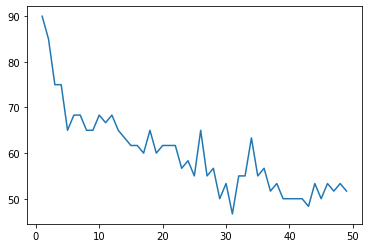

In [44]:
knn_list_b = []
for i in range(1,50):
    knn_model_b = KNeighborsClassifier(n_neighbors=i)
    knn_model_b.fit(x_train_b, y_train_b)
    knn_prediction_b = knn_model_b.predict(x_test)
    knn_accuracy_b = (round(accuracy_score(knn_prediction_b, y_test), 4) * 100) ###percentage
    knn_list_b.append(knn_accuracy_b)
i = np.arange(1,50)

plt.plot(i, knn_list_b)

In [45]:
knn_model_b = KNeighborsClassifier(n_neighbors=6)
knn_model_b.fit(x_train_b, y_train_b)
knn_prediction_b = knn_model_b.predict(x_test)
knn_accuracy_b = (round(accuracy_score(knn_prediction_b, y_test), 4) * 100) ###percentage
accuracy_list2.append(knn_accuracy_b)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, knn_prediction_b, average='weighted')
cm=confusion_matrix(y_test,knn_prediction_b)
print("Train Accuracy: ", knn_accuracy_b)
print("F1 score Test: ", f1_score(knn_prediction_b, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Train Accuracy:  68.33
F1 score Test:  0.42424242424242425
Precision: 0.6777462121212121
Recall of: 0.6833333333333333


array([[34,  9],
       [10,  7]], dtype=int64)

### Decision Tree Classifier

In [46]:
dt_model_b = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt_model_b.fit(x_train_b, y_train_b)
dt_prediction_b = dt_model_b.predict(x_test)
dt_accuracy_b = (round(accuracy_score(dt_prediction_b, y_test), 4) * 100) ###percentage
accuracy_list2.append(dt_accuracy_b)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, dt_prediction_b, average='weighted')
cm=confusion_matrix(y_test,dt_prediction_b)
print("Train Accuracy: ", dt_accuracy_b)
print("F1 score Test: ", f1_score(dt_prediction_b, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Train Accuracy:  85.0
F1 score Test:  0.7567567567567567
Precision: 0.86125
Recall of: 0.85


array([[37,  6],
       [ 3, 14]], dtype=int64)

 ### Naive Bayes

In [47]:
nb_model_b = GaussianNB()
nb_model_b.fit(x_train_b, y_train_b)
nb_prediction_b = nb_model_b.predict(x_test)
nb_accuracy_b = (round(accuracy_score(nb_prediction_b, y_test), 4) * 100) ###percentage
accuracy_list2.append(nb_accuracy_b)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, nb_prediction_b, average='weighted')
cm=confusion_matrix(y_test,nb_prediction_b)
print("Train Accuracy: ", nb_accuracy_b)
print("F1 score Test: ", f1_score(nb_prediction_b, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Train Accuracy:  90.0
F1 score Test:  0.8333333333333333
Precision: 0.9053915275994864
Recall of: 0.9


array([[39,  4],
       [ 2, 15]], dtype=int64)

### Random Forest Classifier

In [48]:
rfc_model_b = RandomForestClassifier()
rfc_model_b.fit(x_train_b, y_train_b)
rfc_prediction_b = rfc_model_b.predict(x_test)
rfc_accuracy_b = (round(accuracy_score(rfc_prediction_b, y_test), 4) * 100) ###percentage
accuracy_list2.append(rfc_accuracy_b)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, rfc_prediction_b, average='weighted')
cm=confusion_matrix(y_test,rfc_prediction_b)
print("Train Accuracy: ", rfc_accuracy_b)
print("F1 score Test: ", f1_score(rfc_prediction_b, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Train Accuracy:  96.67
F1 score Test:  0.9411764705882353
Precision: 0.9666666666666667
Recall of: 0.9666666666666667


array([[42,  1],
       [ 1, 16]], dtype=int64)

### Multi-Layer Perceptron Neural Networks. Evaluate (balanced)

In [49]:
clf_model_b = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)
clf_model_b.fit(x_train_b, y_train_b)
clf_prediction_b = clf_model_b.predict(x_test)
clf_accuracy_b = (round(accuracy_score(clf_prediction_b, y_test), 4) * 100) ###percentage
accuracy_list2.append(clf_accuracy_b)
cm=confusion_matrix(y_test,clf_prediction_b)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, clf_prediction, average='weighted')
print("Train Accuracy: ", clf_accuracy_b)
print("F1 score Test: ", f1_score(clf_prediction_b, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Iteration 1, loss = 17.79933936
Iteration 2, loss = 17.79933926
Iteration 3, loss = 18.24432252
Iteration 4, loss = 18.24432238
Iteration 5, loss = 18.24432224
Iteration 6, loss = 18.24432210
Iteration 7, loss = 18.24432196
Iteration 8, loss = 18.24432183
Iteration 9, loss = 18.24432170
Iteration 10, loss = 17.72266381
Iteration 11, loss = 17.79933808
Iteration 12, loss = 17.79933797
Iteration 13, loss = 17.79933787
Iteration 14, loss = 17.79933777
Iteration 15, loss = 17.79933767
Iteration 16, loss = 17.79933758
Iteration 17, loss = 12.27899951
Iteration 18, loss = 18.24093002
Iteration 19, loss = 18.24432073
Iteration 20, loss = 18.24432066
Iteration 21, loss = 18.24432060
Iteration 22, loss = 18.24432054
Iteration 23, loss = 12.25464099
Iteration 24, loss = 16.44735081
Iteration 25, loss = 17.49099520
Iteration 26, loss = 17.28241278
Iteration 27, loss = 8.61010503
Iteration 28, loss = 14.93587820
Iteration 29, loss = 17.92744112
Iteration 30, loss = 16.07103387
Iteration 31, loss =

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[43,  0],
       [17,  0]], dtype=int64)

In [50]:
accuracy_list

[86.67, 71.67, 71.67, 90.0, 83.33, 93.33, 71.67]

In [51]:
accuracy_list2

[81.67, 68.33, 68.33, 85.0, 90.0, 96.67, 71.67]

In [52]:
models = ["Logistic Regression", "Support Vector Machine", "KNearestNeighbor", "Decision Tree", "Naive Bayes", "Random Forest", "Multi-Layer Perceptron"]

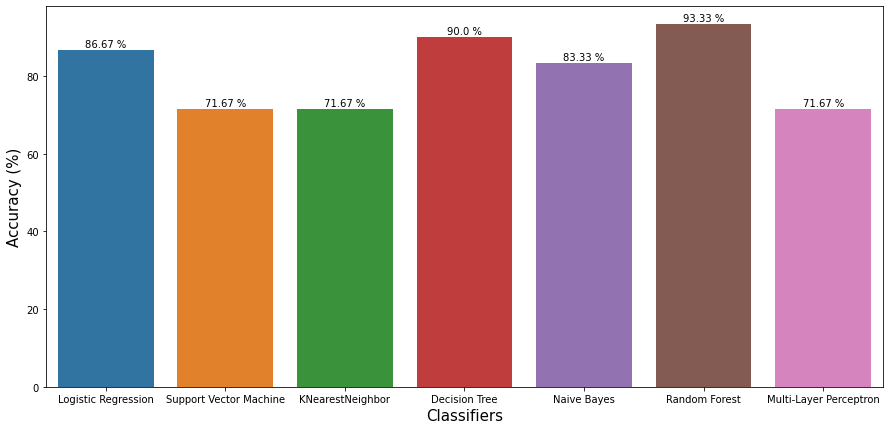

In [53]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha = "center")
    plt.show

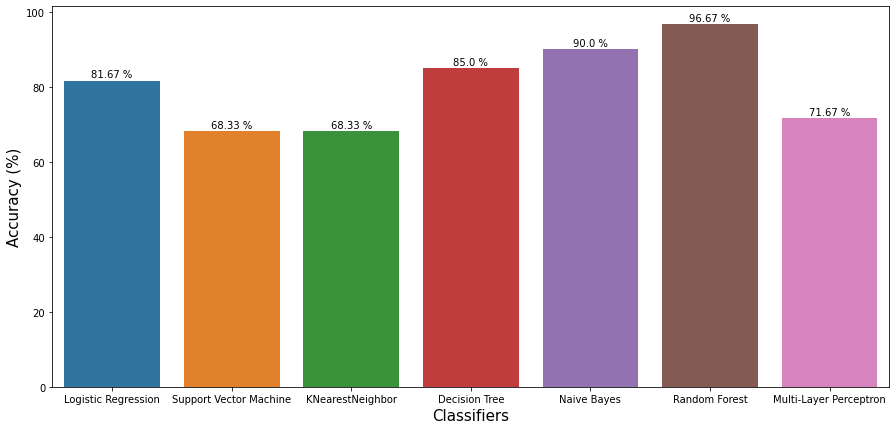

In [54]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x=models, y=accuracy_list2)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha = "center")
    plt.show


## Feature Selection

In [55]:
f_p_values = chi2(x_train,y_train)

In [56]:
f_p_values

(array([3.64883212e+01, 3.43655785e+03, 5.89219756e+01, 1.92265816e+04,
        1.81186062e+01, 8.76735907e-01, 2.89637830e+03]),
 array([1.53583720e-09, 0.00000000e+00, 1.64049767e-14, 0.00000000e+00,
        2.07563297e-05, 3.49097249e-01, 0.00000000e+00]))

In [57]:
p_values = pd.Series(f_p_values[1])
p_values.index=x_train.columns
p_values

age                         1.535837e-09
creatinine_phosphokinase    0.000000e+00
ejection_fraction           1.640498e-14
platelets                   0.000000e+00
serum_creatinine            2.075633e-05
serum_sodium                3.490972e-01
time                        0.000000e+00
dtype: float64

In [58]:
p_values.sort_index(ascending=False)

time                        0.000000e+00
serum_sodium                3.490972e-01
serum_creatinine            2.075633e-05
platelets                   0.000000e+00
ejection_fraction           1.640498e-14
creatinine_phosphokinase    0.000000e+00
age                         1.535837e-09
dtype: float64

the lower the p-value the more statistically significant the variable is 

## Classification III

In [59]:
# i will be selectind 4 features namelt (time,serum_sodium,serum_creatinine,platelets)
x = df[["platelets","serum_creatinine","serum_sodium","time"]]
y = df["DEATH_EVENT"]

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

### Logistic Regression

In [61]:
accuracy_list3 = []

In [62]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_prediction = lr_model.predict(x_test)
lr_accuracy = (round(accuracy_score(lr_prediction, y_test), 4) * 100) ###percentage
accuracy_list3.append(lr_accuracy)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, lr_prediction, average='weighted')
cm=confusion_matrix(y_test,lr_prediction)
print("Train Accuracy: ", lr_accuracy)
print("F1 score Test: ", f1_score(lr_prediction, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Train Accuracy:  86.67
F1 score Test:  0.7333333333333334
Precision: 0.8649208947081288
Recall of: 0.8666666666666667


array([[41,  2],
       [ 6, 11]], dtype=int64)

### Support Vector Machine

In [63]:
svc_model = SVC()
svc_model.fit(x_train, y_train)
svc_prediction = svc_model.predict(x_test)
svc_accuracy = (round(accuracy_score(svc_prediction, y_test), 4) * 100) ###percentage
accuracy_list3.append(svc_accuracy)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, svc_prediction, average='weighted')
cm=confusion_matrix(y_test,svc_prediction)
print("Train Accuracy: ", svc_accuracy)
print("F1 score Test: ", f1_score(svc_prediction, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Train Accuracy:  71.67
F1 score Test:  0.0
Precision: 0.5136111111111111
Recall of: 0.7166666666666667


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[43,  0],
       [17,  0]], dtype=int64)

### KNearestNeighbors

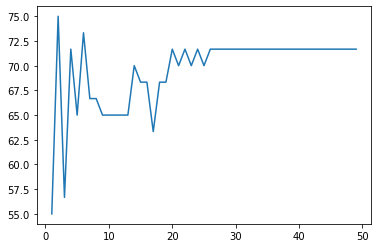

In [64]:
knn_list = []
for i in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    knn_prediction = knn_model.predict(x_test)
    knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100) ###percentage
    knn_list.append(knn_accuracy)
i = np.arange(1,50)
plt.plot(i, knn_list)

In [65]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train, y_train)
knn_prediction = knn_model.predict(x_test)
knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100) ###percentage
accuracy_list3.append(knn_accuracy)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, knn_prediction, average='weighted')
cm=confusion_matrix(y_test,knn_prediction)
print("Train Accuracy: ", knn_accuracy)
print("F1 score Test: ", f1_score(knn_prediction, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))

cm

Train Accuracy:  73.33
F1 score Test:  0.2727272727272727
Precision: 0.7042424242424242
Recall of: 0.7333333333333333


array([[41,  2],
       [14,  3]], dtype=int64)

### Decision Tree Classifier

In [66]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt_model.fit(x_train, y_train)
dt_prediction = dt_model.predict(x_test)
dt_accuracy = (round(accuracy_score(dt_prediction, y_test), 4) * 100) ###percentage
accuracy_list3.append(dt_accuracy)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, dt_prediction, average='weighted')
cm=confusion_matrix(y_test,dt_prediction)
print("Train Accuracy: ", dt_accuracy)
print("F1 score Test: ", f1_score(dt_prediction, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Train Accuracy:  90.0
F1 score Test:  0.7857142857142858
Precision: 0.9122448979591836
Recall of: 0.9


array([[43,  0],
       [ 6, 11]], dtype=int64)

### Naive Bayes 

In [67]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_prediction = nb_model.predict(x_test)
nb_accuracy = (round(accuracy_score(nb_prediction, y_test), 4) * 100) ###percentage
accuracy_list3.append(nb_accuracy)
cm=confusion_matrix(y_test,nb_prediction)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, nb_prediction, average='weighted')
print("Train Accuracy: ", nb_accuracy)
print("F1 score Test: ", f1_score(nb_prediction, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Train Accuracy:  86.67
F1 score Test:  0.7333333333333334
Precision: 0.8649208947081288
Recall of: 0.8666666666666667


array([[41,  2],
       [ 6, 11]], dtype=int64)

### Random Forest 

In [68]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
rfc_prediction = rfc_model.predict(x_test)
rfc_accuracy = (round(accuracy_score(rfc_prediction, y_test), 4) * 100) ###percentage
accuracy_list3.append(rfc_accuracy)
cm=confusion_matrix(y_test,rfc_prediction)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, rfc_prediction, average='weighted')
print("Train Accuracy: ", rfc_accuracy)
print("F1 score Test: ", f1_score(rfc_prediction, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Train Accuracy:  93.33
F1 score Test:  0.8666666666666666
Precision: 0.9390070921985816
Recall of: 0.9333333333333333


array([[43,  0],
       [ 4, 13]], dtype=int64)

### Multi-Layer Perceptron Neural Networks. Evaluate

In [69]:
clf_model = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)
clf_model.fit(x_train, y_train)
clf_prediction = clf_model.predict(x_test)
clf_accuracy = (round(accuracy_score(clf_prediction, y_test), 4) * 100) ###percentage
accuracy_list3.append(clf_accuracy)
cm=confusion_matrix(y_test,clf_prediction)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, clf_prediction, average='weighted')
print("Train Accuracy: ", clf_accuracy)
print("F1 score Test: ", f1_score(clf_prediction, y_test))
print('Precision: '+(str(precision)))
print('Recall of: '+(str(recall)))
cm

Iteration 1, loss = 24.12964768
Iteration 2, loss = 24.12964750
Iteration 3, loss = 24.12964732
Iteration 4, loss = 24.12964714
Iteration 5, loss = 21.26425194
Iteration 6, loss = 11.91401534
Iteration 7, loss = 11.91401519
Iteration 8, loss = 11.91401504
Iteration 9, loss = 11.91401492
Iteration 10, loss = 11.91401480
Iteration 11, loss = 11.91401468
Iteration 12, loss = 11.91401457
Iteration 13, loss = 11.91401447
Iteration 14, loss = 12.96968623
Iteration 15, loss = 24.12964577
Iteration 16, loss = 24.12964569
Iteration 17, loss = 11.91401414
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Train Accuracy:  71.67
F1 score Test:  0.0
Precision: 0.5136111111111111
Recall of: 0.7166666666666667


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[43,  0],
       [17,  0]], dtype=int64)

In [70]:
mdls = ["Logistic Regression", "Support Vector Machine", "KNearestNeighbor", "Decision Tree", "Naive Bayes", "Random Forest","Multi-Layer Perceptron"]

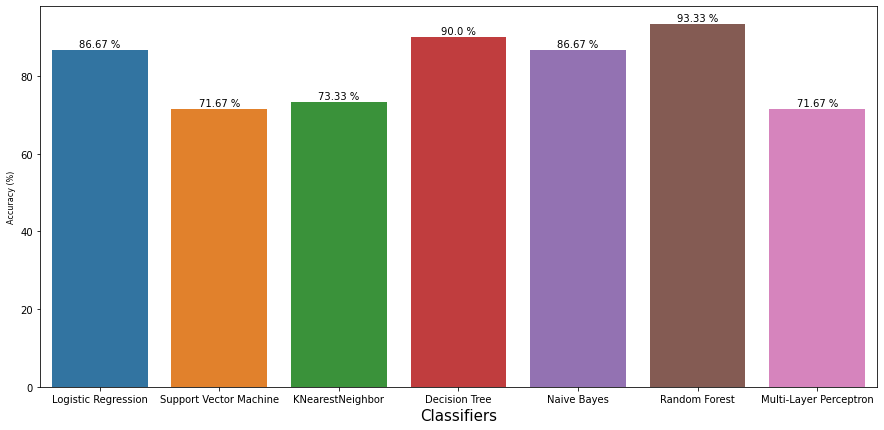

In [71]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x=mdls, y=accuracy_list3)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=8)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha = "center")
    plt.show


### Reference:

1. https://github.com/sauravmishra1710/Heart-Failure-Condition-And-Survival-Analysis
2. https://github.com/yasho191/Heart_Failure_Prediction/tree/main/Heart_Prediction/.ipynb_checkpoints